In [2]:
import pandas as pd
Cleaned=pd.read_csv('/kaggle/input/eda-train/Cleaned_Train.csv')
Cleaned.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,EvidenceRole,...,Registry_Info,Application_Info,OS_Info,Location_Info,Device_Ip,File_Info,Day,Month,Year,PartOfDay
0,0,612,123247,7,6,InitialAccess,T1078;T1078.004,TruePositive,Ip,Related,...,1631 635 860,2251 3421,5 66,6 3 31,27 160396,289573 117668,4,6,2024,Morning
1,88,326,210035,58,43,Exfiltration,T1041,FalsePositive,User,Impacted,...,1631 635 860,2251 3421,5 66,1445 10630 242,360606 160396,289573 117668,14,6,2024,Early Morning
2,809,58352,712507,423,298,InitialAccess,T1189,FalsePositive,Url,Related,...,1631 635 860,2251 3421,5 66,1445 10630 242,360606 68652,289573 117668,13,6,2024,Early Morning
3,92,32992,774301,2,2,CommandAndControl,T1046;T1071;T1210,BenignPositive,Url,Related,...,1631 635 860,2251 3421,5 66,1445 10630 242,360606 13,289573 117668,10,6,2024,Evening
4,148,4359,188041,9,74,Execution,T1559;T1106;T1059.005,TruePositive,User,Impacted,...,1631 635 860,2251 3421,5 66,1445 10630 242,360606 160396,289573 117668,15,6,2024,Early Morning


In [3]:
Cleaned.isnull().sum()

OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
EntityType            0
EvidenceRole          0
Sha256                0
OAuthApplicationId    0
Account_Info          0
Device_Info           0
Registry_Info         0
Application_Info      0
OS_Info               0
Location_Info         0
Device_Ip             0
File_Info             0
Day                   0
Month                 0
Year                  0
PartOfDay             0
dtype: int64

First Step - In here all the data are have a categorical value eventhough it looks like the numerical it was the categorical column so converting all the column into a string datatype and lets starts a EDA Process.

In [4]:
Cleaned = Cleaned.astype(str)

In [5]:
Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465497 entries, 0 to 9465496
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   OrgId               object
 1   IncidentId          object
 2   AlertId             object
 3   DetectorId          object
 4   AlertTitle          object
 5   Category            object
 6   MitreTechniques     object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  Sha256              object
 11  OAuthApplicationId  object
 12  Account_Info        object
 13  Device_Info         object
 14  Registry_Info       object
 15  Application_Info    object
 16  OS_Info             object
 17  Location_Info       object
 18  Device_Ip           object
 19  File_Info           object
 20  Day                 object
 21  Month               object
 22  Year                object
 23  PartOfDay           object
dtypes: object(24)
memory usage: 1.7+ GB


# EDA - ANALYSIS - All the columns relation with IncidentGrade  since it was the target.

***Which organisation have a most number of incidents***

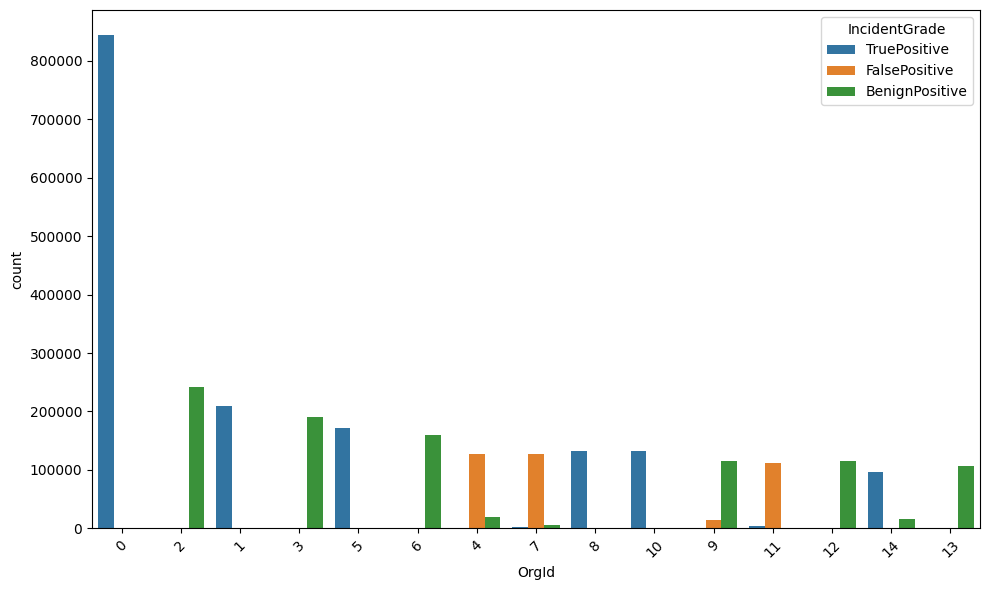

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['OrgId', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['OrgId'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['OrgId'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='OrgId', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


**The organisation 0,1,5,8,10,14 are more likely geting the True Positives Need to give a high alert to this organizations**

**Now lets see which type of alert occurs most**

In [7]:
print(len(Cleaned.AlertTitle.unique()))

79952


['0', '1', '2', '4', '3', '5', '6', '7', '8', '9', '10', '13', '11', '14', '12']


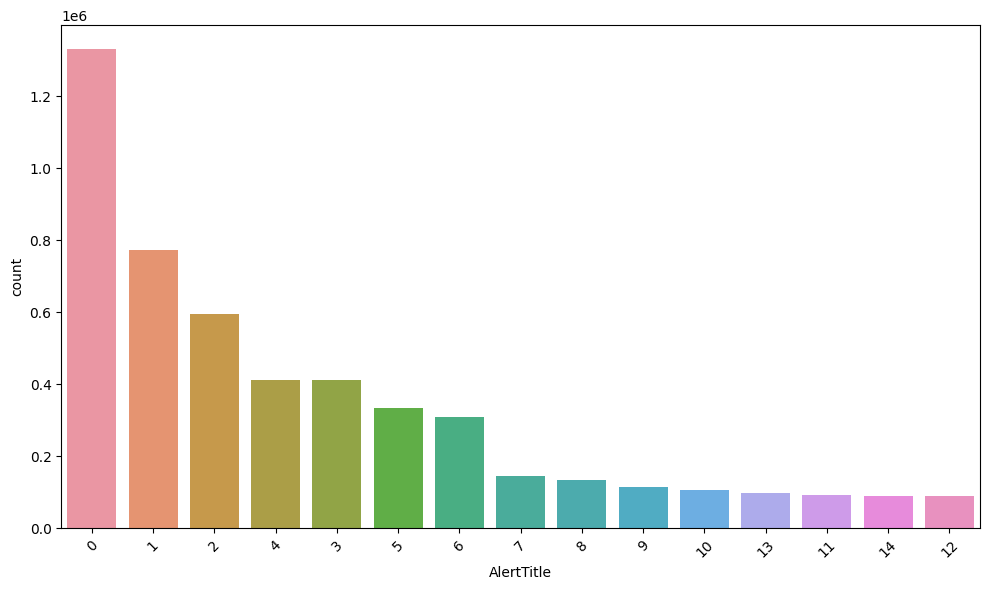

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 AlertTitle by frequency
top_15_alerts = Cleaned['AlertTitle'].value_counts().nlargest(15).index.tolist()
print(top_15_alerts)

# Filter the DataFrame to include only rows with the top 15 AlertTitle
Cleaned_top_15 = Cleaned[Cleaned['AlertTitle'].isin(top_15_alerts)]

# Create the count plot using Seaborn for the top 15 AlertTitle
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='AlertTitle', data=Cleaned_top_15, order=top_15_alerts)

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> So this type of Alert are occuring the most need to decode what kind of alert is this 

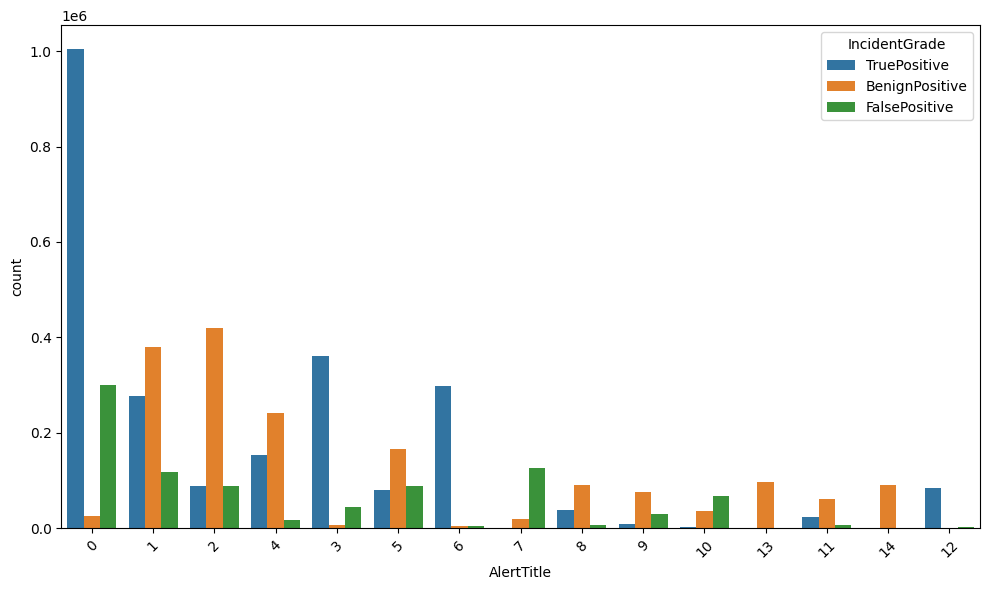

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['AlertTitle', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['AlertTitle'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['AlertTitle'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='AlertTitle', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> **The Alerttitle of 0,1,2,4,3,6 are encountering the most number of the Threats so need more focus for this kind of Alerttitle.Seems like this column will usefull in classification Task as well.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

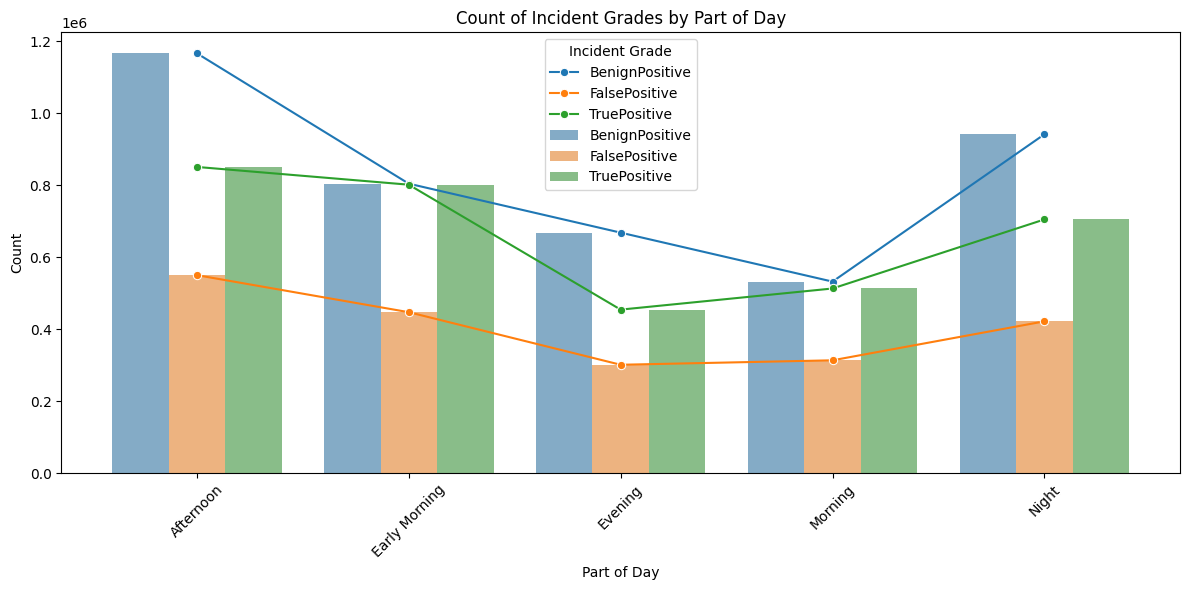

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by PartOfDay and IncidentGrade, and count occurrences
grouped_data = Cleaned.groupby(['PartOfDay', 'IncidentGrade']).size().reset_index(name='Count')

# Create a figure
plt.figure(figsize=(12, 6))

# Create a bar plot for counts of each IncidentGrade
bar_plot = sns.barplot(x='PartOfDay', y='Count', hue='IncidentGrade', data=grouped_data, alpha=0.6)

# Overlay a line plot for each IncidentGrade
for incident_grade in grouped_data['IncidentGrade'].unique():
    subset = grouped_data[grouped_data['IncidentGrade'] == incident_grade]
    sns.lineplot(x='PartOfDay', y='Count', data=subset, marker='o', label=incident_grade)

# Set labels and title
plt.xlabel('Part of Day')
plt.ylabel('Count')
plt.title('Count of Incident Grades by Part of Day')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

> ****Seems Like in Afternoon,Early Morning and in Night the most number of the Threats are happening****

**Now Lets see which month the most number of threats are happening.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

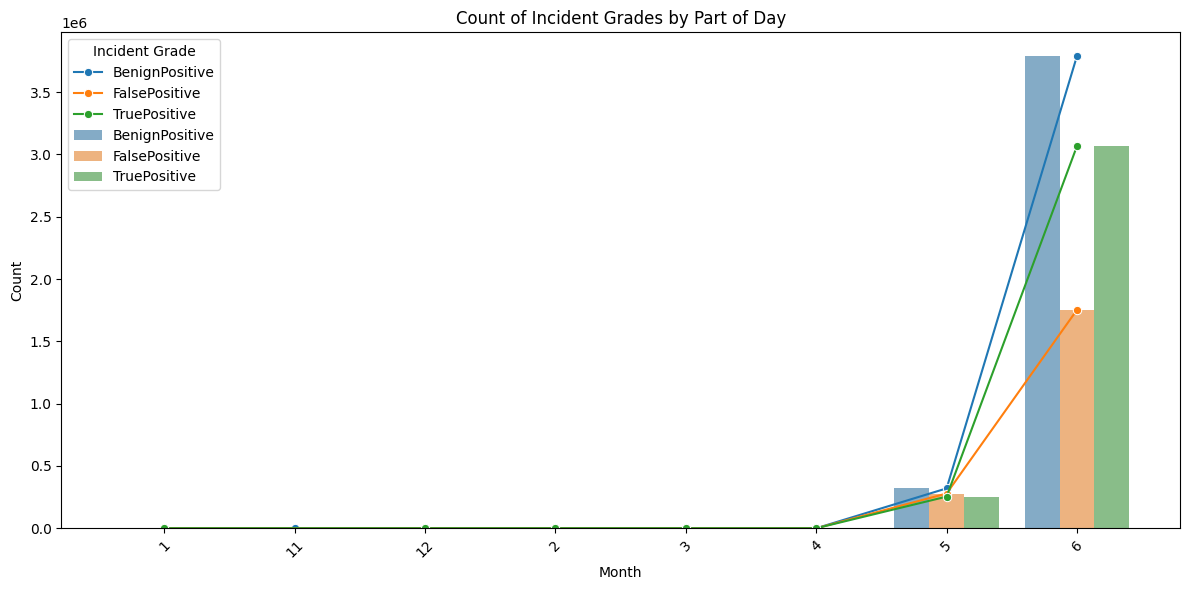

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by Month and IncidentGrade, and count occurrences
grouped_data = Cleaned.groupby(['Month', 'IncidentGrade']).size().reset_index(name='Count')

# Create a figure
plt.figure(figsize=(12, 6))

# Create a bar plot for counts of each IncidentGrade
bar_plot = sns.barplot(x='Month', y='Count', hue='IncidentGrade', data=grouped_data, alpha=0.6)

# Overlay a line plot for each IncidentGrade
for incident_grade in grouped_data['IncidentGrade'].unique():
    subset = grouped_data[grouped_data['IncidentGrade'] == incident_grade]
    sns.lineplot(x='Month', y='Count', data=subset, marker='o', label=incident_grade)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Incident Grades by Part of Day')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

***> It shows in Months 6th and 5th only the most number of the incident is happening when compare to the other Months so need more attention to this thing***

**Let Find Which day Likly there are more number of threats are happening**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

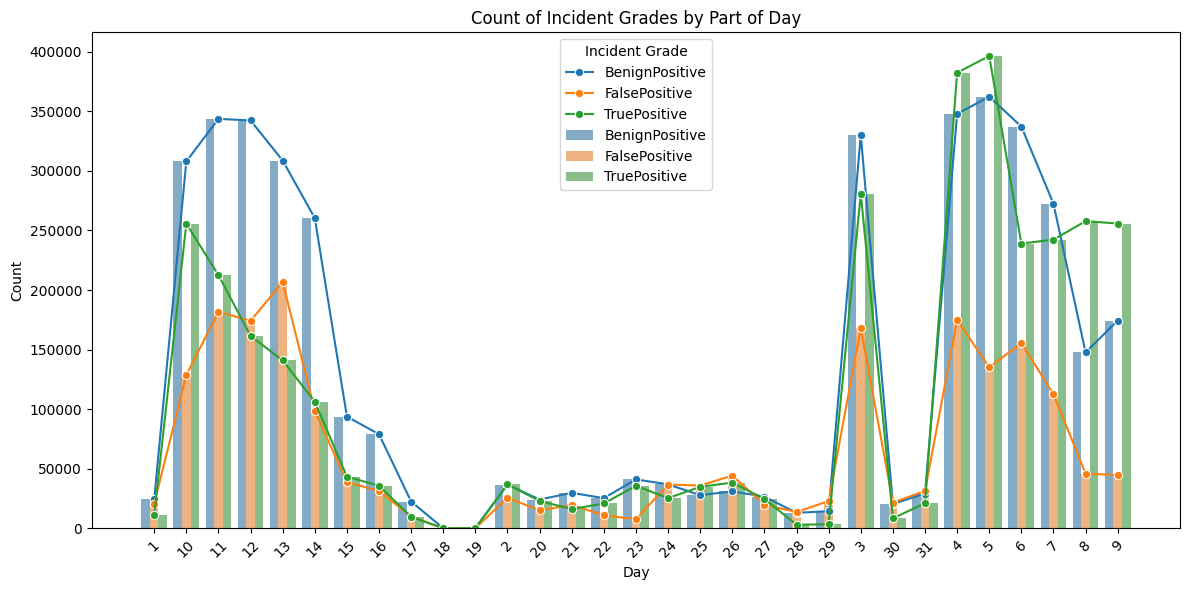

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by Day and IncidentGrade, and count occurrences
grouped_data = Cleaned.groupby(['Day', 'IncidentGrade']).size().reset_index(name='Count')

# Create a figure
plt.figure(figsize=(12, 6))

# Create a bar plot for counts of each IncidentGrade
bar_plot = sns.barplot(x='Day', y='Count', hue='IncidentGrade', data=grouped_data, alpha=0.6)

# Overlay a line plot for each IncidentGrade
for incident_grade in grouped_data['IncidentGrade'].unique():
    subset = grouped_data[grouped_data['IncidentGrade'] == incident_grade]
    sns.lineplot(x='Day', y='Count', data=subset, marker='o', label=incident_grade)

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Incident Grades by Part of Day')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

***> Seems Like From 3rd to 14th day of the month are encondering the most number of threats need more focus on this days***

**Which category is have a most number of threats**

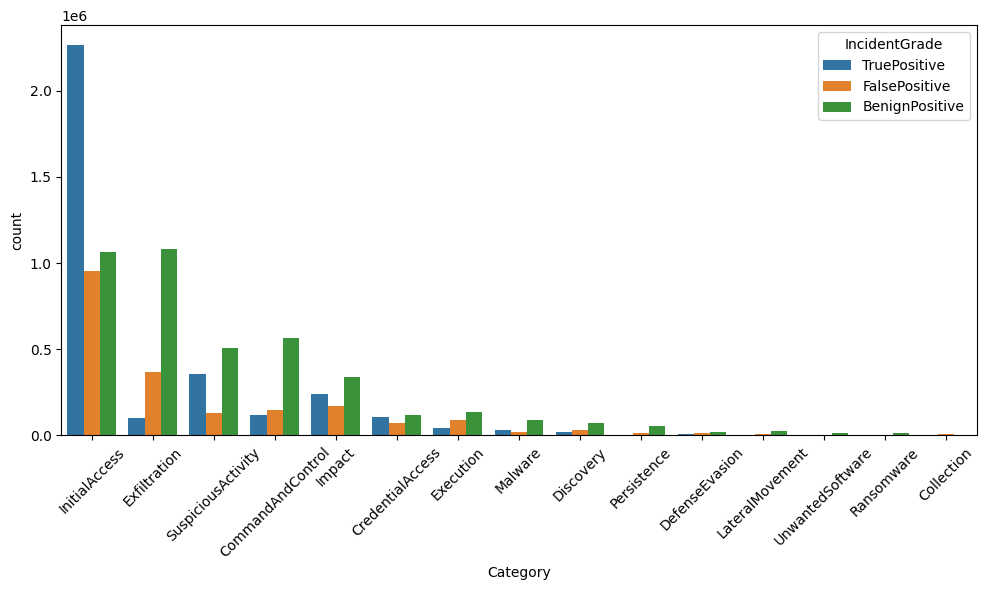

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Category', 'IncidentGrade']).count()

# Get the top 15 Category by frequency
top_15_orgs = Cleaned['Category'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 Category
Cleaned_top_15 = Cleaned[Cleaned['Category'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 Category
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Category', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


***> In category like IntialAccess,Exfiltration,SuspiciousActivity,CommandAndControlImpact are encoundering most number of threads and expecially in InitialAccess have the more Truepositive when compare to other Category.***

**Lets see Which EntityType Have more number of threats**

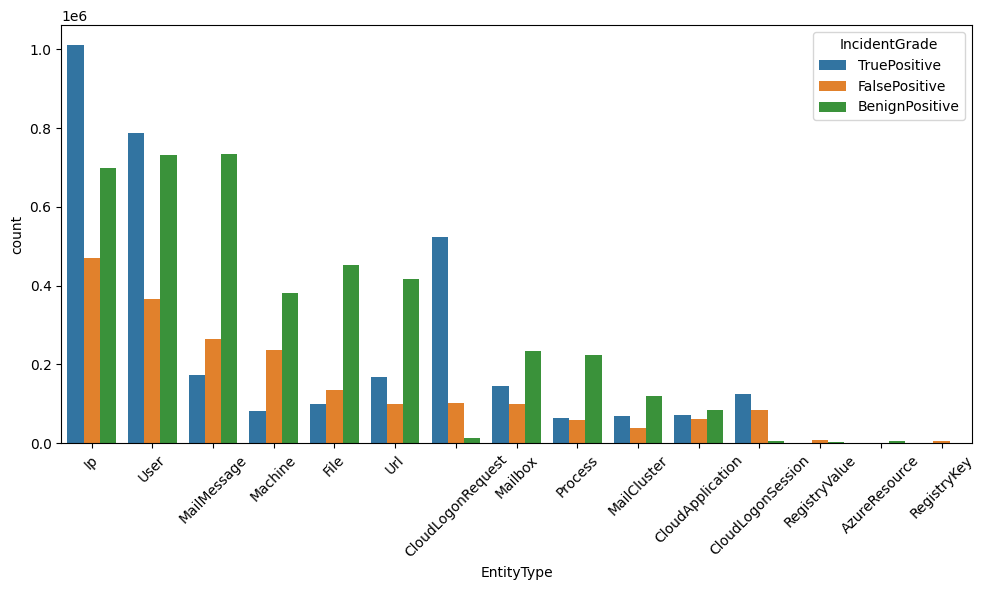

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['EntityType', 'IncidentGrade']).count()

# Get the top 15 Category by frequency
top_15_orgs = Cleaned['EntityType'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 Category
Cleaned_top_15 = Cleaned[Cleaned['EntityType'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 Category
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='EntityType', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


***> This Kind of entity are responisible for the causing the Threat***

**Similarly do the same for the EvidenceRole**

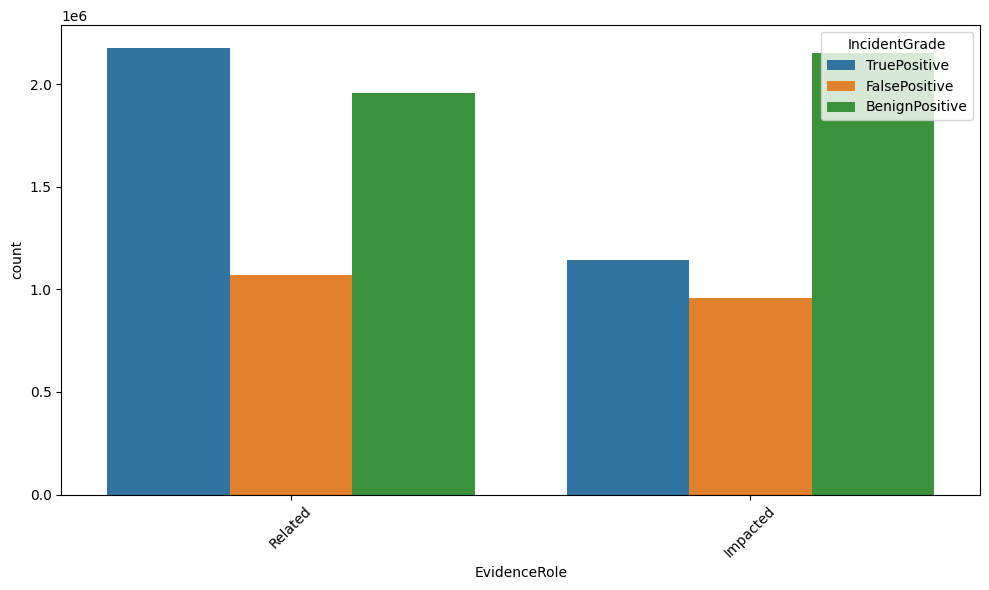

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['EvidenceRole', 'IncidentGrade']).count()

# Get the top 15 Category by frequency
top_15_orgs = Cleaned['EvidenceRole'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 Category
Cleaned_top_15 = Cleaned[Cleaned['EvidenceRole'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 Category
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='EvidenceRole', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


**Lets find Which file is contributing more for Threat**

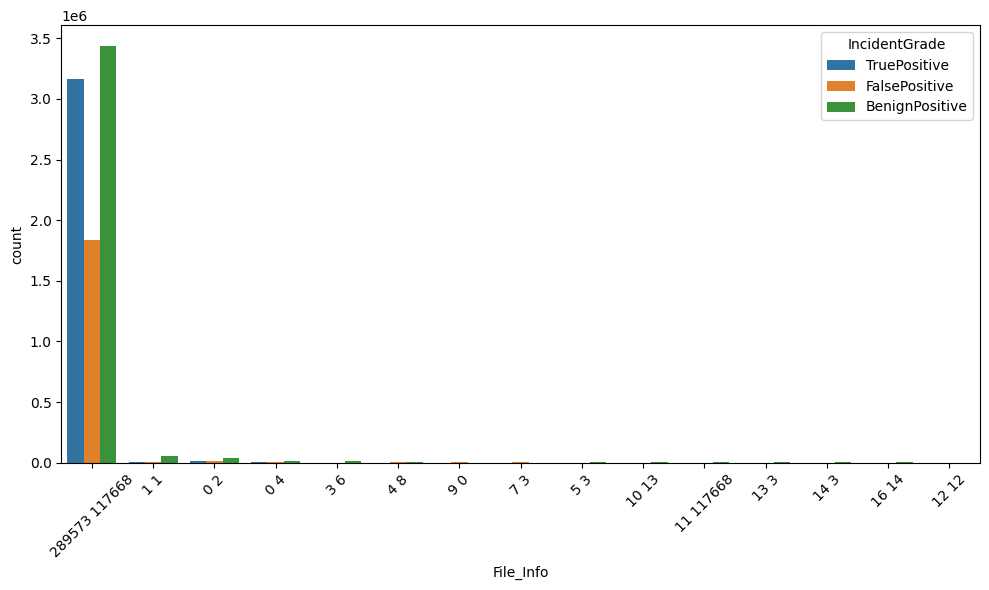

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['File_Info', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['File_Info'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['File_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='File_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> ***Only This file is contributing the most for the Threat***

**Lets Findout which type of Accounts is responsible for the most number of threats**

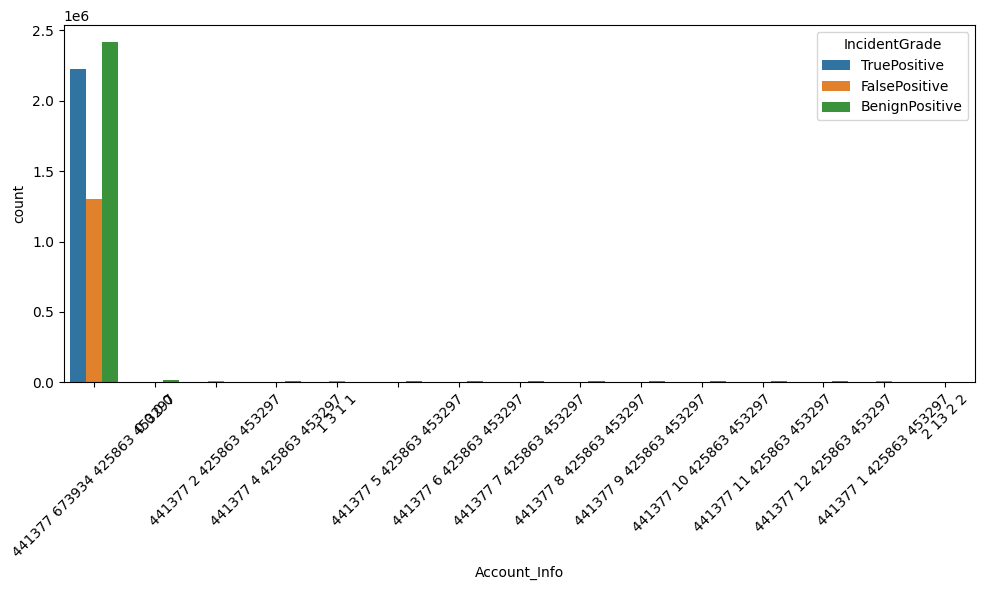

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Account_Info', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Account_Info'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Account_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Account_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> ***This also shows that very few accounts are probobaly causing the most number of the Threats***

**Lets Find which Device is contributing more for the Threats**

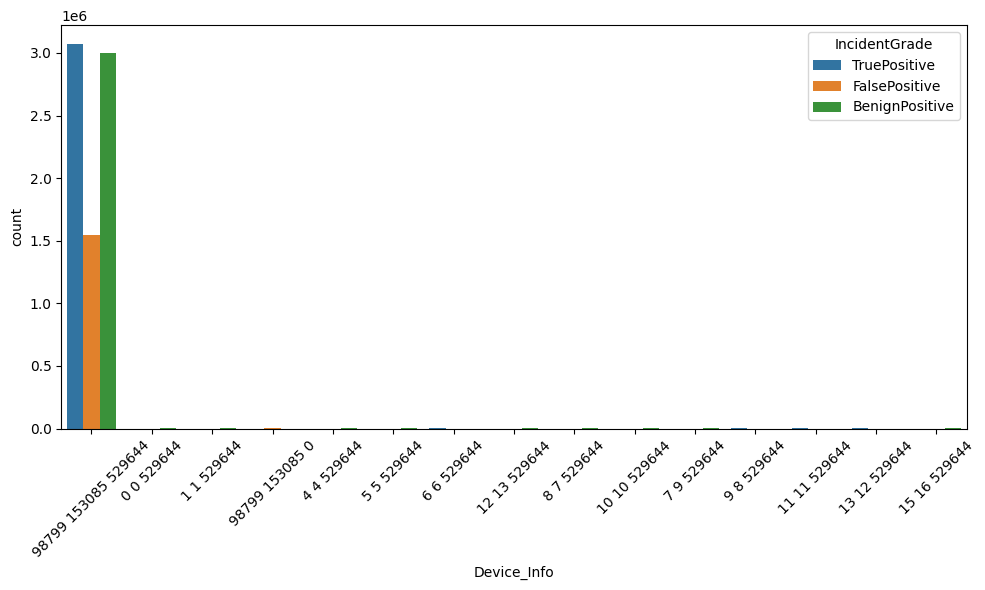

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Device_Info', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Device_Info'].value_counts().nlargest(15).index

# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Device_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Device_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> ***By seeing this only few type of device are contributing the most***

**Lets see which type of Registry is responsible for Most number of the Threats**

                              OrgId  IncidentId  AlertId  DetectorId  \
Registry_Info IncidentGrade                                            
0 635 860     BenignPositive     40          40       40          40   
              FalsePositive   11036       11036    11036       11036   
1 2 0         BenignPositive     12          12       12          12   
              FalsePositive       1           1        1           1   
1 2 1         BenignPositive     48          48       48          48   
...                             ...         ...      ...         ...   
996 1 449     BenignPositive      2           2        2           2   
997 1 499     BenignPositive      2           2        2           2   
998 635 860   BenignPositive      1           1        1           1   
999 635 860   FalsePositive       1           1        1           1   
              TruePositive        1           1        1           1   

                              AlertTitle  Category  MitreTechni

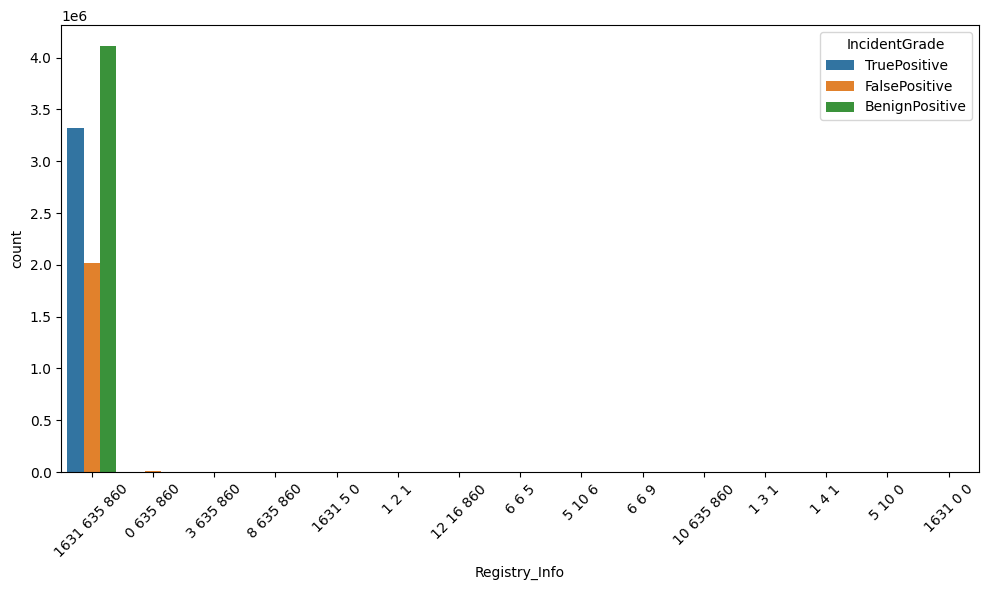

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Registry_Info', 'IncidentGrade']).count()
print(a)
# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Registry_Info'].value_counts().nlargest(15).index
print(top_15_orgs)
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Registry_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Registry_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


> **For this also I can say Only few type of the Registry is responsible for the most number of threats**

**Similarly lets check the OS_Info**

                          OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
OS_Info IncidentGrade                                                          
0 0     BenignPositive   118925      118925   118925      118925      118925   
        FalsePositive     38214       38214    38214       38214       38214   
        TruePositive      28954       28954    28954       28954       28954   
0 1     BenignPositive     1226        1226     1226        1226        1226   
        FalsePositive       246         246      246         246         246   
...                         ...         ...      ...         ...         ...   
3 66    TruePositive          1           1        1           1           1   
4 36    TruePositive          1           1        1           1           1   
5 66    BenignPositive  3987518     3987518  3987518     3987518     3987518   
        FalsePositive   1992427     1992427  1992427     1992427     1992427   
        TruePositive    3292623     3292

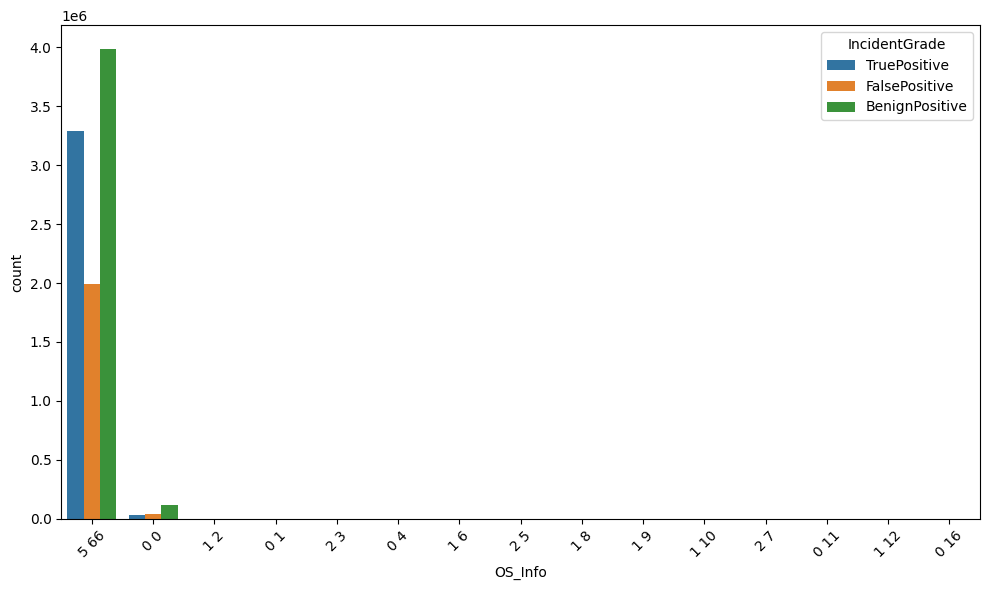

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['OS_Info', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['OS_Info'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['OS_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='OS_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> ***This also hugely depends on only one first few Thing***

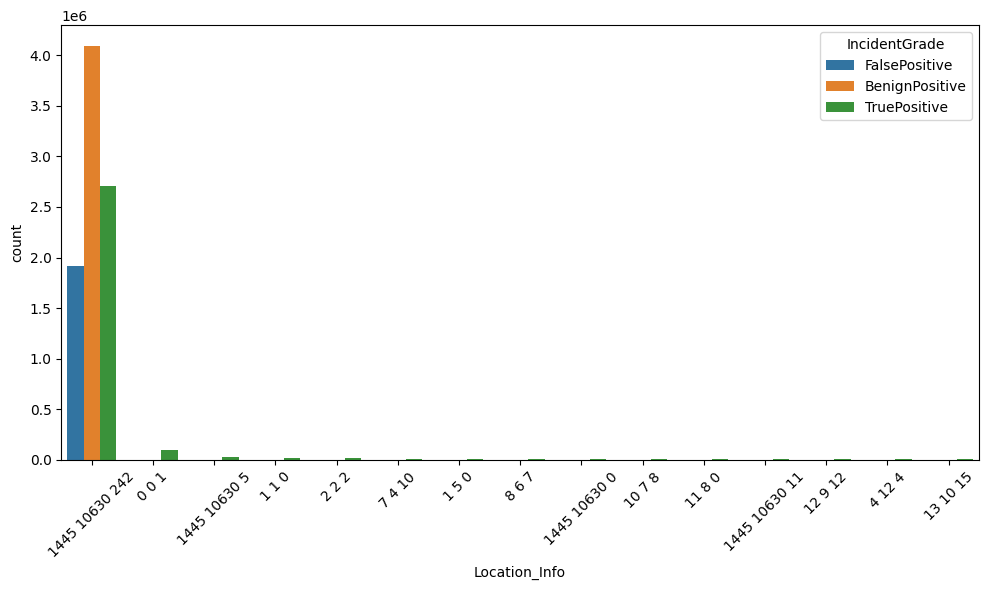

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Location_Info', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Location_Info'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Location_Info'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Location_Info', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Similarly do the same for the Sha256**

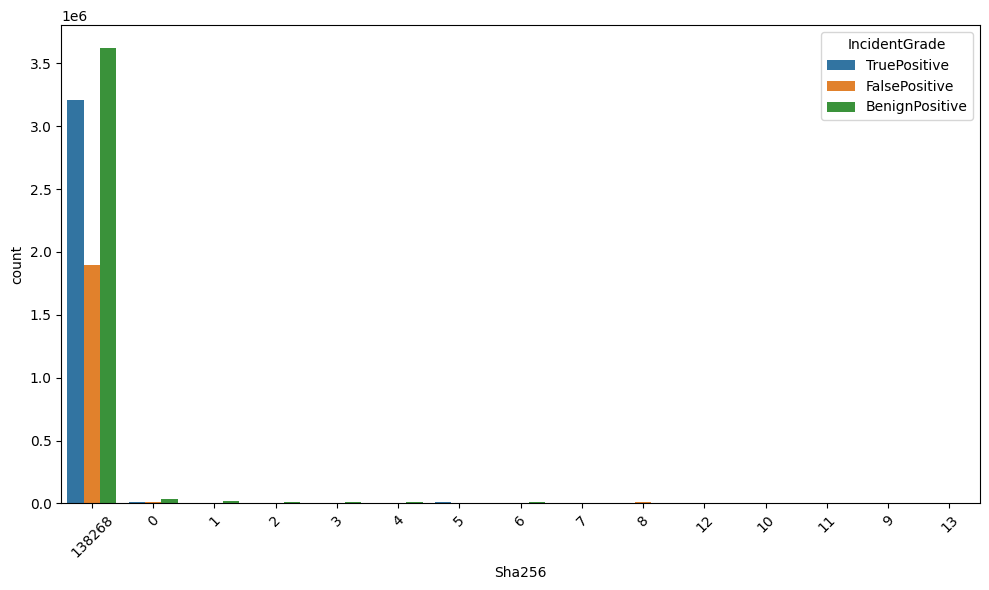

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['Sha256', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Sha256'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Sha256'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Sha256', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> ***This also says that only one is contributing more for the Threat***

**Let check the similarly for OAuthApplicationId**

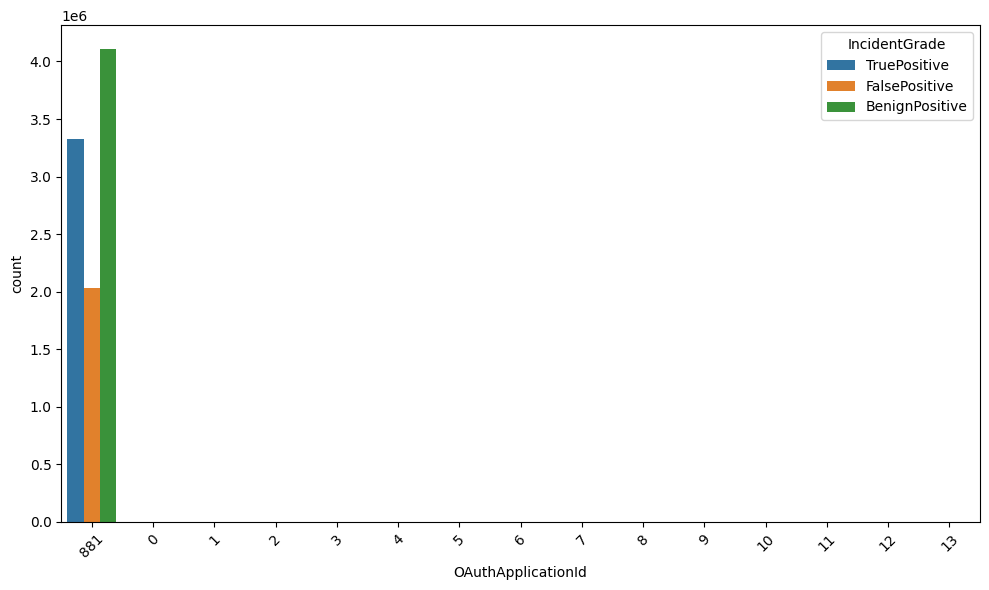

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['OAuthApplicationId', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['OAuthApplicationId'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['OAuthApplicationId'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='OAuthApplicationId', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> ***It also shows that only one is contributing more of the Threats***

**Let see which technique is mostly used for the threat creation**

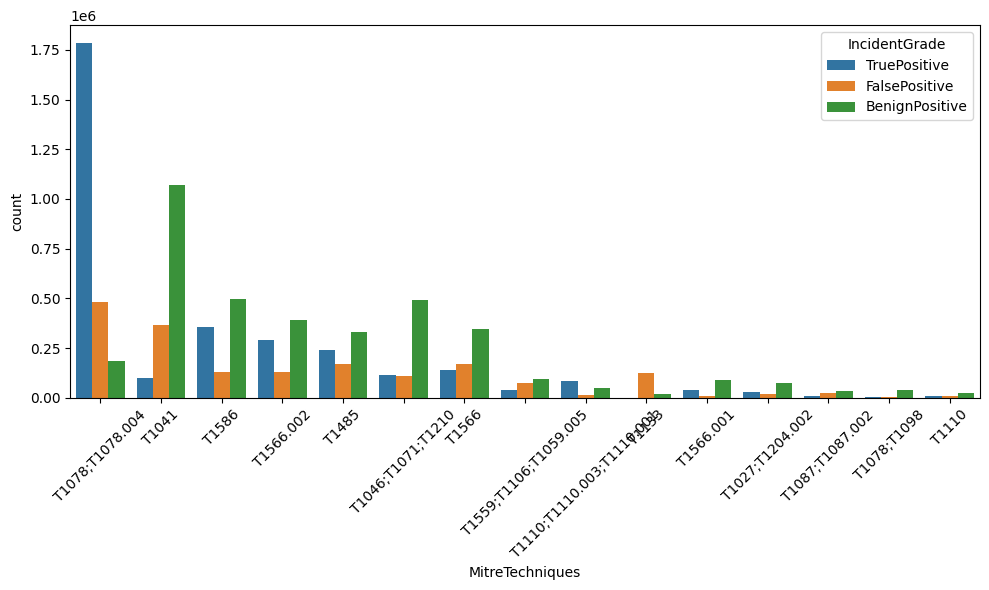

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as you did before
a = Cleaned.groupby(['MitreTechniques', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['MitreTechniques'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['MitreTechniques'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='MitreTechniques', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Let's check the same for DetectorId**

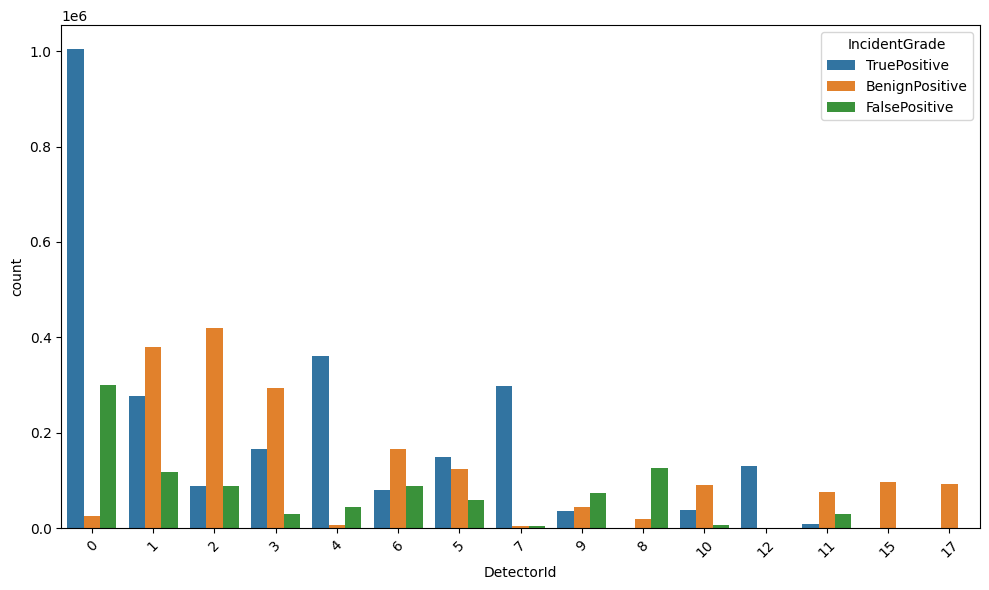

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as did before
a = Cleaned.groupby(['DetectorId', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['DetectorId'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['DetectorId'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='DetectorId', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> ***Seems like 0,4,1,7 are more use full for detecting the alert and this are getting more Threats***

**Lets Find How DeviceIp is impacting the Results**

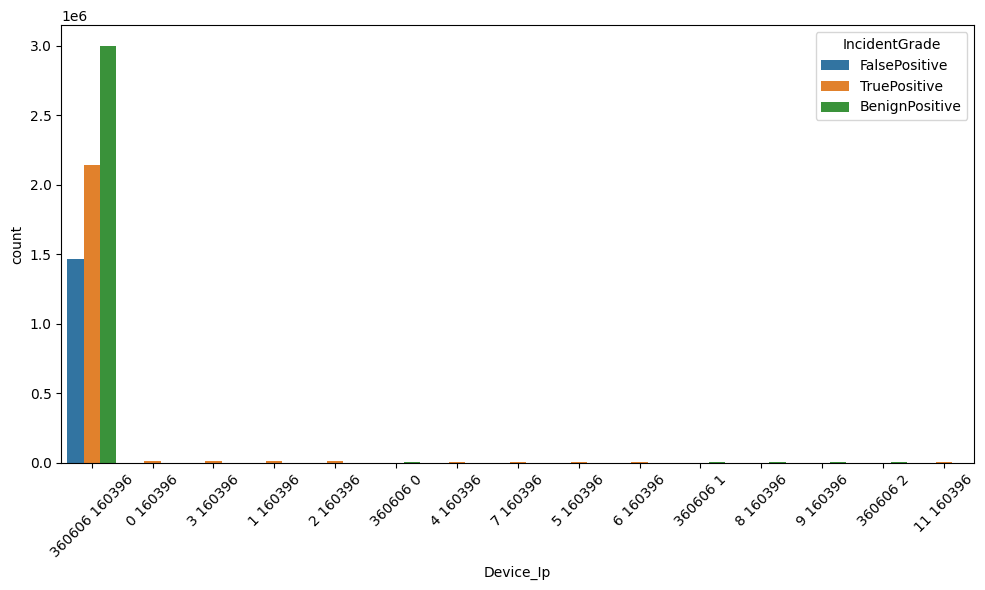

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data as did before
a = Cleaned.groupby(['Device_Ip', 'IncidentGrade']).count()

# Get the top 15 OrgId by frequency
top_15_orgs = Cleaned['Device_Ip'].value_counts().nlargest(15).index
# Filter the DataFrame to include only rows with the top 15 OrgId
Cleaned_top_15 = Cleaned[Cleaned['Device_Ip'].isin(top_15_orgs)]

# Creating the count plot using Seaborn for the top 15 OrgId
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Device_Ip', hue='IncidentGrade', data=Cleaned_top_15, 
              order=top_15_orgs)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> ***So from This only the most number of threats is happening ***

# Conclusion

By seeing the usefull columns for the classifications are only 9 columns namely

**Version 1**

MithreTechniques,EvidenceRole,Incidentgrade,Detector Id,AlertTitle,Part of the Day,Day,category,Entity type 

But I have Also choose one more so the version 2 will be 

**Version 2**

MithreTechniques,EvidenceRole,Incidentgrade,Detector Id,AlertTitle,Part of the Day,Day,category,Entity type,Device_IP 

In [29]:
Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465497 entries, 0 to 9465496
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   OrgId               object
 1   IncidentId          object
 2   AlertId             object
 3   DetectorId          object
 4   AlertTitle          object
 5   Category            object
 6   MitreTechniques     object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  Sha256              object
 11  OAuthApplicationId  object
 12  Account_Info        object
 13  Device_Info         object
 14  Registry_Info       object
 15  Application_Info    object
 16  OS_Info             object
 17  Location_Info       object
 18  Device_Ip           object
 19  File_Info           object
 20  Day                 object
 21  Month               object
 22  Year                object
 23  PartOfDay           object
dtypes: object(24)
memory usage: 1.7+ GB


**Version 1**

In [30]:
Version1=Cleaned[['DetectorId','AlertTitle','Category','MitreTechniques','EntityType','EvidenceRole','Day','PartOfDay','IncidentGrade']]
Version1.head()

,DetectorId,AlertTitle,Category,MitreTechniques,EntityType,EvidenceRole,Day,PartOfDay,IncidentGrade
0,7,6,InitialAccess,T1078;T1078.004,Ip,Related,4,Morning,TruePositive
1,58,43,Exfiltration,T1041,User,Impacted,14,Early Morning,FalsePositive
2,423,298,InitialAccess,T1189,Url,Related,13,Early Morning,FalsePositive
3,2,2,CommandAndControl,T1046;T1071;T1210,Url,Related,10,Evening,BenignPositive
4,9,74,Execution,T1559;T1106;T1059.005,User,Impacted,15,Early Morning,TruePositive


**EXPORTING**

In [31]:
Version1.to_csv('ML_Train_Data.csv',index=False)

**Version 2**

In [32]:
Version2=Cleaned[['DetectorId','AlertTitle','Category','MitreTechniques','EntityType','EvidenceRole','Device_Ip','Day','PartOfDay','IncidentGrade']]
Version2.head()

,DetectorId,AlertTitle,Category,MitreTechniques,EntityType,EvidenceRole,Device_Ip,Day,PartOfDay,IncidentGrade
0,7,6,InitialAccess,T1078;T1078.004,Ip,Related,27 160396,4,Morning,TruePositive
1,58,43,Exfiltration,T1041,User,Impacted,360606 160396,14,Early Morning,FalsePositive
2,423,298,InitialAccess,T1189,Url,Related,360606 68652,13,Early Morning,FalsePositive
3,2,2,CommandAndControl,T1046;T1071;T1210,Url,Related,360606 13,10,Evening,BenignPositive
4,9,74,Execution,T1559;T1106;T1059.005,User,Impacted,360606 160396,15,Early Morning,TruePositive


**EXPORTING**

In [33]:
Version2.to_csv('ML_Train_Data_V2.csv',index=False)